<a href="https://colab.research.google.com/github/billybutcheroi/CMAPSS_Dataset/blob/main/CMAPSS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##CMAPSS Dataset
The below code is an attempt to predict the RUL(Remaning Useful Life) of a jet engine given a series of sensor readings
The data is being taken from Cmapss dataset and it is divided into 3 text file
1. train
2. test
3. rul

In each  train dataset there are 100 units(engines) and thier respective sensor reading.

There are a set of 4 test and train data with different fault modes and conditions

This code only works on the 1st set labbelled as train_FD001

In [302]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##Getting the data

In [303]:
import pandas as pd

dataset_path = "/content/drive/My Drive/CMAPSS/train_FD001.txt"
train = pd.read_csv(dataset_path, delim_whitespace=True,header=None)
train

<ipython-input-303-2dee89df4a1c>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  train = pd.read_csv(dataset_path, delim_whitespace=True,header=None)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


##Preprocessing the Data

In [304]:
train.columns = ["unit", "time", "op_set_1", "op_set_2", "op_set_3"] + [f"sensor_{i}" for i in range(1, 22)]
print(train.head())


   unit  time  op_set_1  op_set_2  op_set_3  sensor_1  sensor_2  sensor_3  \
0     1     1   -0.0007   -0.0004     100.0    518.67    641.82   1589.70   
1     1     2    0.0019   -0.0003     100.0    518.67    642.15   1591.82   
2     1     3   -0.0043    0.0003     100.0    518.67    642.35   1587.99   
3     1     4    0.0007    0.0000     100.0    518.67    642.35   1582.79   
4     1     5   -0.0019   -0.0002     100.0    518.67    642.37   1582.85   

   sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  sensor_15  \
0   1400.60     14.62  ...     521.66    2388.02    8138.62     8.4195   
1   1403.14     14.62  ...     522.28    2388.07    8131.49     8.4318   
2   1404.20     14.62  ...     522.42    2388.03    8133.23     8.4178   
3   1401.87     14.62  ...     522.86    2388.08    8133.83     8.3682   
4   1406.22     14.62  ...     522.19    2388.04    8133.80     8.4294   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        39

#Normalising the data

In [305]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sensor_columns = [f'sensor_{i}' for i in range(1, 22)]
train[sensor_columns] = scaler.fit_transform(train[sensor_columns])
train

,unit,time,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_12,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21
0,1,1,-0.0007,-0.0004,100.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.633262,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662
1,1,2,0.0019,-0.0003,100.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.765458,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014
2,1,3,-0.0043,0.0003,100.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.795309,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375
3,1,4,0.0007,0.0000,100.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.889126,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386
4,1,5,-0.0019,-0.0002,100.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.746269,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.170576,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500
20627,100,197,-0.0016,-0.0005,100.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.211087,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197
20628,100,198,0.0004,0.0000,100.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.281450,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991
20629,100,199,-0.0011,0.0003,100.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.208955,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466


#Loading the test data

In [306]:

test_path = "/content/drive/My Drive/CMAPSS/test_FD001.txt"
test = pd.read_csv(test_path,sep=' ',header=None)
len(test)

13096

In [391]:
#RUL
labels_path = "/content/drive/My Drive/CMAPSS/RUL_FD001.txt"
labels = pd.read_csv(labels_path,header=None)
labels

,0
0,112
1,98
2,69
3,82
4,91
...,...
95,137
96,82
97,59
98,117


In [308]:
print(train.columns)

Index(['unit', 'time', 'op_set_1', 'op_set_2', 'op_set_3', 'sensor_1',
       'sensor_2', 'sensor_3', 'sensor_4', 'sensor_5', 'sensor_6', 'sensor_7',
       'sensor_8', 'sensor_9', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21'],
      dtype='object')


In [309]:
#Find the RUL using the unit and time column
max_cycles = train.groupby("unit")["time"].max()  # Get max cycles per engine
train["RUL"] = train.apply(lambda row: max_cycles[row["unit"]] - row["time"], axis=1)
train.head(192)

,unit,time,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,191.0
1,1,2,0.0019,-0.0003,100.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,190.0
2,1,3,-0.0043,0.0003,100.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,189.0
3,1,4,0.0007,0.0000,100.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,188.0
4,1,5,-0.0019,-0.0002,100.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,187.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,1,188,-0.0067,0.0003,100.0,0.0,0.765060,0.683235,0.684166,0.0,...,0.514706,0.091599,0.753367,0.0,0.666667,0.0,0.0,0.286822,0.089202,4.0
188,1,189,-0.0006,0.0002,100.0,0.0,0.894578,0.547853,0.772451,0.0,...,0.661765,0.090670,0.744132,0.0,0.583333,0.0,0.0,0.263566,0.301712,3.0
189,1,190,-0.0027,0.0001,100.0,0.0,0.731928,0.614345,0.737677,0.0,...,0.691176,0.065229,0.759523,0.0,0.833333,0.0,0.0,0.271318,0.239299,2.0
190,1,191,-0.0000,-0.0004,100.0,0.0,0.641566,0.682799,0.734639,0.0,...,0.617647,0.075704,0.740669,0.0,0.500000,0.0,0.0,0.240310,0.324910,1.0


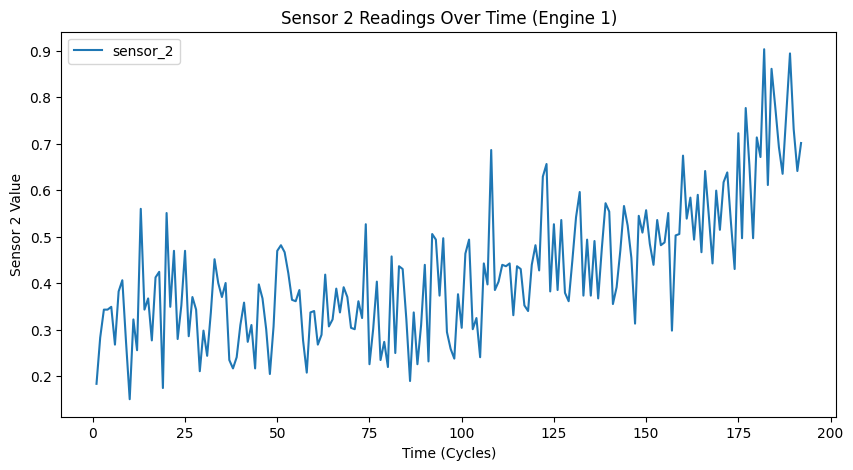

In [310]:
#Plotting the data
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

# Plot sensor_2 over time for a specific engine (unit 1)
train[train["unit"] == 1].plot(x="time", y="sensor_2", kind="line", figsize=(10, 5))
plt.title("Sensor 2 Readings Over Time (Engine 1)")
plt.xlabel("Time (Cycles)")
plt.ylabel("Sensor 2 Value")
plt.show()


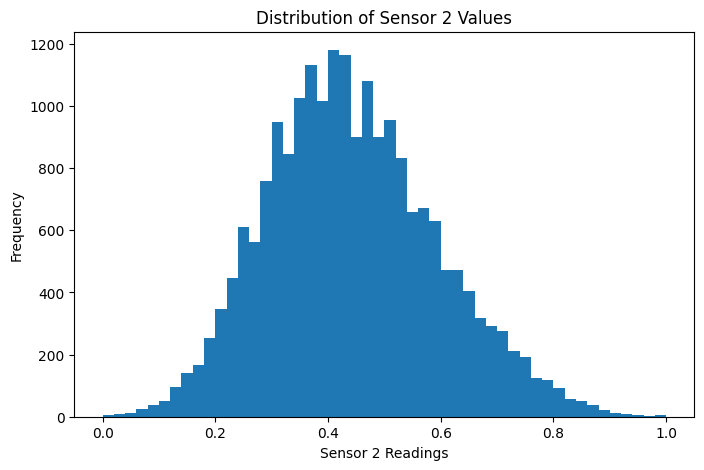

In [311]:
train["sensor_2"].plot(kind="hist", bins=50, figsize=(8, 5))
plt.title("Distribution of Sensor 2 Values")
plt.xlabel("Sensor 2 Readings")
plt.ylabel("Frequency")
plt.show()


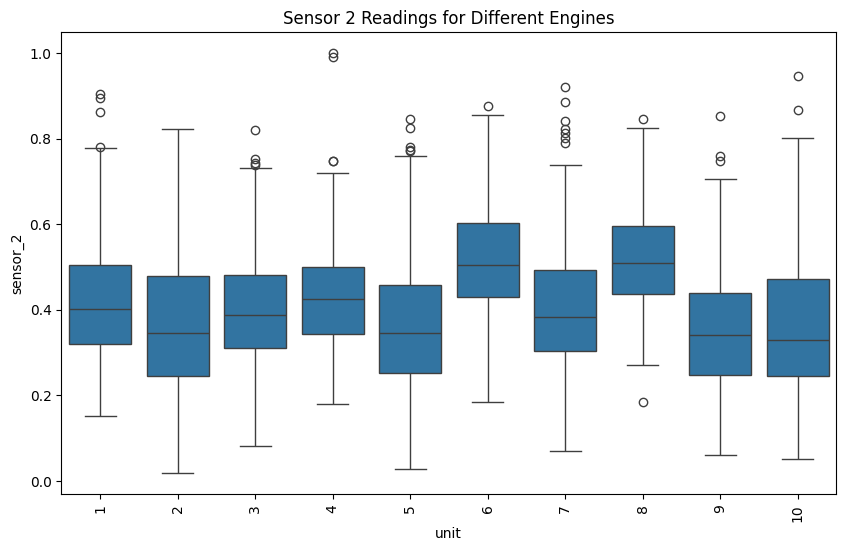

In [312]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x="unit", y="sensor_2", data=train[train["unit"] <= 10])  # First 10 engines
plt.title("Sensor 2 Readings for Different Engines")
plt.xticks(rotation=90)
plt.show()


In [313]:
train["unit"]

,unit
0,1
1,1
2,1
3,1
4,1
...,...
20626,100
20627,100
20628,100
20629,100


In [314]:
features = [col for col in train.columns]
features

['unit',
 'time',
 'op_set_1',
 'op_set_2',
 'op_set_3',
 'sensor_1',
 'sensor_2',
 'sensor_3',
 'sensor_4',
 'sensor_5',
 'sensor_6',
 'sensor_7',
 'sensor_8',
 'sensor_9',
 'sensor_10',
 'sensor_11',
 'sensor_12',
 'sensor_13',
 'sensor_14',
 'sensor_15',
 'sensor_16',
 'sensor_17',
 'sensor_18',
 'sensor_19',
 'sensor_20',
 'sensor_21',
 'RUL']

In [315]:
train["unit"]

,unit
0,1
1,1
2,1
3,1
4,1
...,...
20626,100
20627,100
20628,100
20629,100


In [316]:
for x in range(len(train["unit"])):
  print(x)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

#Creating a sliding window for LSTM model

In [317]:
import numpy as np

def create_sliding_window(X, y, window_size=50):
    """
    Converts time-series data into LSTM-compatible sequences using a sliding window.

    Parameters:
        X (pd.DataFrame): Feature data.
        y (pd.Series): Target (RUL) values.
        window_size (int): Number of past time steps to include in each sample.

    Returns:
        tuple: (X_processed, y_processed) ready for LSTM.
    """
    X_out, y_out = [], []

    for i in range(len(X) - window_size):
        X_out.append(X.iloc[i:i + window_size].values)  # Collect `window_size` past time steps
        y_out.append(y.iloc[i + window_size])  # Corresponding target at the end of the window

    return np.array(X_out), np.array(y_out)

# Apply sliding window to train & test sets
window_size = 50  # Example window size



In [318]:
train["RUL"][:4150]

,RUL
0,191.0
1,190.0
2,189.0
3,188.0
4,187.0
...,...
4145,22.0
4146,21.0
4147,20.0
4148,19.0


In [319]:
len(train)

20631

In [320]:
train["RUL"][:16504]

,RUL
0,191.0
1,190.0
2,189.0
3,188.0
4,187.0
...,...
16499,92.0
16500,91.0
16501,90.0
16502,89.0


#Function to evaluate our model

In [321]:
import tensorflow as tf

def evaluate_preds(y_true, y_pred):
  # Make sure float32 (for metric calculations)
  y_true = tf.cast(y_true, dtype=tf.float32)
  y_pred = tf.cast(y_pred, dtype=tf.float32)

  # Calculate various metrics
  mae = tf.keras.losses.MeanAbsoluteError()(y_true, y_pred)
  mse = tf.keras.losses.MeanSquaredError()(y_true, y_pred)
  rmse = tf.sqrt(mse)
  # Changed from tf.keras.losses.Rsquared() to tf.keras.metrics.R2Score()
  # It seems like Rsquared is deprecated.
  # https://stackoverflow.com/questions/75209973/importerror-cannot-import-name-rsquared-from-tensorflow-keras-metrics
  r = tf.keras.metrics.R2Score()(y_true, y_pred)


  # Convert tf.Tensor objects to NumPy arrays using .numpy()
  return {"mae": mae.numpy(),
          "mse": mse.numpy(),
          "rmse": rmse.numpy(),
          "r2": r.numpy(), # Updated to use 'r2' in the results

          }

In [322]:
test_dataset_path = "/content/drive/My Drive/CMAPSS/test_FD001.txt"
test = pd.read_csv(dataset_path, delim_whitespace=True,header=None)
test

<ipython-input-322-81c8b1a62862>:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  test = pd.read_csv(dataset_path, delim_whitespace=True,header=None)


,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,521.66,2388.02,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,522.28,2388.07,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,522.42,2388.03,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,522.86,2388.08,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,522.19,2388.04,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,518.67,643.49,1597.98,1428.63,14.62,...,519.49,2388.26,8137.60,8.4956,0.03,397,2388,100.0,38.49,22.9735
20627,100,197,-0.0016,-0.0005,100.0,518.67,643.54,1604.50,1433.58,14.62,...,519.68,2388.22,8136.50,8.5139,0.03,395,2388,100.0,38.30,23.1594
20628,100,198,0.0004,0.0000,100.0,518.67,643.42,1602.46,1428.18,14.62,...,520.01,2388.24,8141.05,8.5646,0.03,398,2388,100.0,38.44,22.9333
20629,100,199,-0.0011,0.0003,100.0,518.67,643.23,1605.26,1426.53,14.62,...,519.67,2388.23,8139.29,8.5389,0.03,395,2388,100.0,38.29,23.0640


In [323]:
test.columns = ["unit", "time", "op_set_1", "op_set_2", "op_set_3"] + [f"sensor_{i}" for i in range(1, 22)]
print(test.head())

   unit  time  op_set_1  op_set_2  op_set_3  sensor_1  sensor_2  sensor_3  \
0     1     1   -0.0007   -0.0004     100.0    518.67    641.82   1589.70   
1     1     2    0.0019   -0.0003     100.0    518.67    642.15   1591.82   
2     1     3   -0.0043    0.0003     100.0    518.67    642.35   1587.99   
3     1     4    0.0007    0.0000     100.0    518.67    642.35   1582.79   
4     1     5   -0.0019   -0.0002     100.0    518.67    642.37   1582.85   

   sensor_4  sensor_5  ...  sensor_12  sensor_13  sensor_14  sensor_15  \
0   1400.60     14.62  ...     521.66    2388.02    8138.62     8.4195   
1   1403.14     14.62  ...     522.28    2388.07    8131.49     8.4318   
2   1404.20     14.62  ...     522.42    2388.03    8133.23     8.4178   
3   1401.87     14.62  ...     522.86    2388.08    8133.83     8.3682   
4   1406.22     14.62  ...     522.19    2388.04    8133.80     8.4294   

   sensor_16  sensor_17  sensor_18  sensor_19  sensor_20  sensor_21  
0       0.03        39

In [324]:
len(test)

20631

# PCA (Principal Component Analysis)

As there are 22 features(sensor reading), the below code reduces it to a dimension in which 95% of the variance is intact after reducing it's dimensionality

In [325]:
 from sklearn.decomposition import PCA
 pca = PCA()
 pca.fit(train)
 cumsum = np.cumsum(pca.explained_variance_ratio_)
 d = np.argmax(cumsum >= 0.95) + 1
 d

np.int64(3)

In [326]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D = pca.fit_transform(train)

In [327]:
import pandas as pd  # Import pandas if not already imported

# Convert X2D to a Pandas DataFrame
X2D_df = pd.DataFrame(X2D)

# Add the 'RUL' column
X2D_df["RUL"] = train["RUL"]

# Now X2D_df contains the PCA transformed data and the 'RUL' column
X2D_df

,0,1,2,RUL
0,135.057987,-36.603648,-38.910809,191.0
1,133.643530,-36.603715,-38.910713,190.0
2,132.229627,-36.603640,-38.910833,189.0
3,130.815787,-36.603566,-38.910935,188.0
4,129.400946,-36.603678,-38.910773,187.0
...,...,...,...,...
20626,-135.060015,9.191139,49.043098,4.0
20627,-136.474280,9.191126,49.043128,3.0
20628,-137.888938,9.191044,49.043225,2.0
20629,-139.303068,9.191060,49.043215,1.0


#Normalising RUL

In [328]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
sensor_columns = [f'sensor_{i}' for i in range(1, 22)]
train[sensor_columns] = scaler.fit_transform(train[sensor_columns])
train["RUL"] = scaler.fit_transform(train[["RUL"]])
train

,unit,time,op_set_1,op_set_2,op_set_3,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,...,sensor_13,sensor_14,sensor_15,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,RUL
0,1,1,-0.0007,-0.0004,100.0,0.0,0.183735,0.406802,0.309757,0.0,...,0.205882,0.199608,0.363986,0.0,0.333333,0.0,0.0,0.713178,0.724662,0.529086
1,1,2,0.0019,-0.0003,100.0,0.0,0.283133,0.453019,0.352633,0.0,...,0.279412,0.162813,0.411312,0.0,0.333333,0.0,0.0,0.666667,0.731014,0.526316
2,1,3,-0.0043,0.0003,100.0,0.0,0.343373,0.369523,0.370527,0.0,...,0.220588,0.171793,0.357445,0.0,0.166667,0.0,0.0,0.627907,0.621375,0.523546
3,1,4,0.0007,0.0000,100.0,0.0,0.343373,0.256159,0.331195,0.0,...,0.294118,0.174889,0.166603,0.0,0.333333,0.0,0.0,0.573643,0.662386,0.520776
4,1,5,-0.0019,-0.0002,100.0,0.0,0.349398,0.257467,0.404625,0.0,...,0.235294,0.174734,0.402078,0.0,0.416667,0.0,0.0,0.589147,0.704502,0.518006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20626,100,196,-0.0004,-0.0003,100.0,0.0,0.686747,0.587312,0.782917,0.0,...,0.558824,0.194344,0.656791,0.0,0.750000,0.0,0.0,0.271318,0.109500,0.011080
20627,100,197,-0.0016,-0.0005,100.0,0.0,0.701807,0.729453,0.866475,0.0,...,0.500000,0.188668,0.727203,0.0,0.583333,0.0,0.0,0.124031,0.366197,0.008310
20628,100,198,0.0004,0.0000,100.0,0.0,0.665663,0.684979,0.775321,0.0,...,0.529412,0.212148,0.922278,0.0,0.833333,0.0,0.0,0.232558,0.053991,0.005540
20629,100,199,-0.0011,0.0003,100.0,0.0,0.608434,0.746021,0.747468,0.0,...,0.514706,0.203065,0.823394,0.0,0.583333,0.0,0.0,0.116279,0.234466,0.002770


#Splitting the test data into 70% train and 30% test

In [329]:
x = len(X2D)-int(len(X2D_df)*0.3)
x

14442

In [330]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D = pca.fit_transform(train)
X2D.shape

(20631, 3)

In [331]:
X_train = X2D_df.drop(["RUL"],axis=1)[:x]
y_train = X2D_df["RUL"][:x]
X_test = X2D_df.drop(["RUL"],axis=1)[x:]
y_test = X2D_df["RUL"][x:]
len(X_train),len(y_test),len(X_test),len(y_train)

(14442, 6189, 6189, 14442)

In [332]:
X_train_seq, y_train_seq = create_sliding_window(X_train, y_train, 100)
X_test_seq, y_test_seq = create_sliding_window(X_test, y_test, 100)

In [333]:
window_size

50

In [334]:
X_train_seq.shape

(14342, 100, 3)

#Building the model(Hybrid of Conv1D() and LSTM)

In [335]:
import tensorflow as tf
from tensorflow.keras.layers import Bidirectional


from tensorflow.keras import layers, models # Import models here as well
tf.random.set_seed(42)

def build_lstm_model(input_shape):
    """


    Builds an LSTM model for RUL prediction.

    Parameters:
        input_shape (tuple): Shape of input data (timesteps, features).

    Returns:
        model: Compiled LSTM model.
    """

    model = models.Sequential([
        layers.Conv1D(filters=64, kernel_size=3,activation="relu", padding='same', input_shape=input_shape),
        layers.Dropout(0.2),
        layers.AveragePooling1D(pool_size=5),
        layers.LSTM(128, return_sequences=True,input_shape=input_shape),
        layers.Dropout(0.2),
        #layers.LSTM(64, return_sequences=True),
        #layers.Dropout(0.2),
        layers.LSTM(64),
        layers.Dropout(0.2),
        layers.Dense(64, activation="linear"),
        layers.Dense(32),
        layers.Dense(1, activation="linear")  # Output layer for regression
    ])

    # Corrected: Adam -> tf.keras.optimizers.Adam
    model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(), metrics=["mae"])
    return model

# Get input shape from train data
input_shape = (X_train_seq.shape[1], X_train_seq.shape[2])  # (timesteps, features)

# Build the model
model = build_lstm_model(input_shape)

# Print model summary

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_10 (Conv1D)                   │ (None, 100, 64)             │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_30 (Dropout)                 │ (None, 100, 64)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ average_pooling1d_10                 │ (None, 20, 64)              │               0 │
│ (AveragePooling1D)                   │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_20 (LSTM)                       │ (None, 20, 128)             │          98,816 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_31 (Dropout)                 │ (None, 20, 128)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_21 (LSTM)                       │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_32 (Dropout)                 │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 64)                  │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 155,137 (606.00 KB)

 Trainable params: 155,137 (606.00 KB)

 Non-trainable params: 0 (0.00 B)

In [336]:
# Assuming 'model' is your Keras model object
from tensorflow.keras.callbacks import EarlyStopping


early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=1, verbose=1)




history = model.fit(
    X_train_seq,
    y_train_seq,
    epochs=30,  # Adjust epochs as needed

    batch_size=32,
    validation_data=(X_test_seq, y_test_seq),  # If you have validation data
    verbose=1,
    callbacks=[early_stop,reduce_lr]
)


Epoch 1/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 4415.3809 - mae: 41.8775 - val_loss: 347.7690 - val_mae: 9.9622 - learning_rate: 0.0010
Epoch 2/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 365.2643 - mae: 10.7844 - val_loss: 246.0210 - val_mae: 5.3365 - learning_rate: 0.0010
Epoch 3/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step - loss: 332.9665 - mae: 10.1415 - val_loss: 237.2773 - val_mae: 6.4094 - learning_rate: 0.0010
Epoch 4/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 310.6077 - mae: 9.3965
Epoch 4: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
449/449 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 310.5782 - mae: 9.3962 - val_loss: 241.6009 - val_mae: 5.9309 - learning_rate: 0.0010
Epoch 5/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 279.4994 - mae: 8.6102 - val_loss: 233.5593 - val_mae: 6.0990 - learning_rate: 5.0000e-04
Epoch 6/30
449/449 ━━━━━━━━━━━━━━━━━━━━ 10s 11ms/step - loss: 259.3959 - mae: 8.3701 - val_loss: 200.3437 - va

#Plotting the loss curve

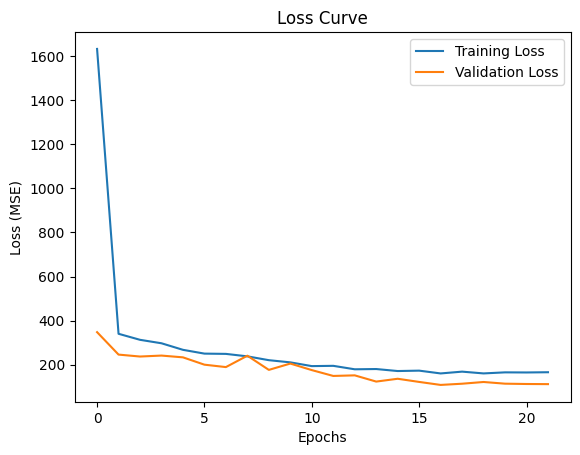

In [337]:
import matplotlib.pyplot as plt

# Plot loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Loss Curve")
plt.legend()
plt.show()


In [338]:
# Evaluate on Test Data
test_loss, test_mae = model.evaluate(X_test_seq, y_test_seq)
print(f"Test MSE: {test_loss:.4f}, Test MAE: {test_mae:.4f}")

# Predict RUL
y_pred = model.predict(X_test_seq)


y_pred[:11],y_test_seq[:11]


191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 104.7204 - mae: 2.3730
Test MSE: 108.5796, Test MAE: 2.5517
191/191 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


(array([[  4.5065136],
        [  3.203745 ],
        [  2.6567686],
        [  2.4728472],
        [  2.567449 ],
        [  3.2299337],
        [  5.632633 ],
        [ 26.355371 ],
        [112.6083   ],
        [121.05295  ],
        [213.91957  ]], dtype=float32),
 array([  8.,   7.,   6.,   5.,   4.,   3.,   2.,   1.,   0., 212., 211.]))

In [339]:
# Make predictions with our LSTM model
model_results = evaluate_preds(y_true=tf.squeeze(y_test_seq),
                                 y_pred=y_pred)  # Do not squeeze y_pred
model_results

{'mae': np.float32(2.5517292),
 'mse': np.float32(108.57959),
 'rmse': np.float32(10.420153),
 'r2': np.float32(0.9801155)}

In [349]:
model.save("model.keras")  # Or model.save("model.h5")

In [351]:
from tensorflow import keras
loaded_model = keras.models.load_model("model.keras")


In [340]:
len(test)

20631

In [341]:
test["unit"][191]

np.int64(1)

In [382]:
test["unit"][10731]

np.int64(54)

In [343]:
from sklearn.preprocessing import MinMaxScaler
column_names = test.columns.tolist()
# Select sensor and operational data (excluding unit and time columns)
feature_columns = column_names[2:]  # Excluding 'unit' and 'time'
scaler = MinMaxScaler()

# Normalize data
test[feature_columns] = scaler.fit_transform(test[feature_columns])
from sklearn.decomposition import PCA

pca = PCA(n_components=3)
X2D_test = pca.fit_transform(test)

# Define function to create sequences (same as used during training)
def create_sequences(data, original_df, sequence_length=100):
    sequences = []
    units = original_df["unit"].unique()  # Access 'unit' from original DataFrame

    for unit in units:
        # Filter data based on unit in the original DataFrame
        unit_indices = original_df[original_df["unit"] == unit].index

        # Use these indices to get corresponding rows from the transformed data
        unit_data = data[unit_indices]

        for i in range(len(unit_data) - sequence_length + 1):
            sequences.append(unit_data[i: i + sequence_length])

    return np.array(sequences)

# Create sequences
sequence_length = 50  # Adjust based on training settings
X_test_seq_1 = create_sequences(X2D_test, test, 100)  # Pass the original DataFrame

print(f"Test sequences shape: {X_test_seq_1.shape}")

Test sequences shape: (10731, 100, 3)


In [390]:
pred_test = loaded_model.predict(X_test_seq_1)
pred_test

336/336 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[ 96.6471 ],
       [ 96.74073],
       [ 96.83536],
       ...,
       [189.35269],
       [190.10141],
       [190.84888]], dtype=float32)